In [28]:
import scipy.io as sio
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import math
from copy import deepcopy
import pickle

In [29]:
def calculate_center(joint_pos):
    center_x = 0
    center_y = 0
    for val in joint_pos.values():
        center_x += val[0]
        center_y += val[1]
        
    center_x = center_x/len(joint_pos)
    center_y = center_y/len(joint_pos)
    
    return center_x, center_y

def calculate_sigma(joint_pos, center_x, center_y):
    sigma = 0
    for i in ['r_elbow', 'r_shoulder', 'r_wrist', 'l_shoulder']:
        x_diff = joint_pos[i][0] - center_x
        y_diff = joint_pos[i][1] - center_y
        sigma = sigma + x_diff*x_diff + y_diff*y_diff
    
    sigma = 0.25 * sigma
    sigma = math.sqrt(sigma)
    
    return sigma

def fix_size(max_val, curr_val):
    if curr_val < 0:
        return 0
    elif curr_val > max_val:
        return max_val
    else:
        return curr_val

def update_joint_pos_using_center(img_file, joint_pos, center_x, center_y, sigma):
    img_center_x = joint_pos['r_elbow'][0]
    img_center_y = joint_pos['r_elbow'][1]
    img_dir = "mp2/images/"
    img = cv2.imread(img_dir+img_file)
    max_x = img.shape[1]
    max_y = img.shape[0]
    x_start = fix_size(max_x, (img_center_x - sigma))
    x_end = fix_size(max_x, (img_center_x+sigma))
    y_start = fix_size(max_y, (img_center_y-sigma))
    y_end = fix_size(max_y, (img_center_y+sigma))
    
    height = y_end - y_start
    width = x_end - x_start
    
    if width == 0:
        print('max_x: ', max_x, 'center_x: ', center_x, 'sigma: ', sigma)
    
    new_joint_loc = {}
    for joint in ['r_elbow', 'r_wrist', 'r_shoulder', 'l_shoulder']:
        new_x = joint_pos[joint][0] - x_start
        new_x = (new_x/width)*96
        
        new_y = joint_pos[joint][1] - y_start
        new_y = (new_y/height)*96
        
        new_joint_loc[joint] = [new_x, new_y]
        
        #print('joint name: ', joint, 'joint_x: ', joint_pos[joint][0], 'joint_y: ', joint_pos[joint][1])
        #print('center_x: ', center_x, 'center_y: ', center_y, 'sigma: ', sigma)
        #print('x_start: ', x_start, 'y_start: ', y_start)
        #print('height: ', height, 'width: ', width)
        
    
    return new_joint_loc

def update_keypoint_locations(img_lst, joint_lst):
    new_joint_lst = []
    # Iterate over right hand saved images
    for indx, joint_dict in enumerate(joint_lst):
        print('Processing index: ', indx)
        # Calculate the center using keypoints
        center_x, center_y = calculate_center(joint_dict)                       
        sigma = calculate_sigma(joint_dict, center_x, center_y)
        new_joint_map = update_joint_pos_using_center(img_lst[indx], joint_dict, center_x, center_y, sigma)
        new_joint_lst.append(new_joint_map)
        
    return new_joint_lst
        
        
        



# Calculate the origin, width and height of window at one sigma
# Calculate the new position of keypoints by subtracting by origin and scaling by 96x96
# Calculate the mean and covariance for each cluster

In [30]:
img_data = pickle.load(open( "img_data.p", "rb" ))


In [31]:
new_joint_lst = update_keypoint_locations(img_data['img_lst'], img_data['orig_joint_lst'])

Processing index:  0
Processing index:  1
Processing index:  2
Processing index:  3
Processing index:  4
Processing index:  5
Processing index:  6
Processing index:  7
Processing index:  8
Processing index:  9
Processing index:  10
Processing index:  11
Processing index:  12
Processing index:  13
Processing index:  14
Processing index:  15
Processing index:  16
Processing index:  17
Processing index:  18
Processing index:  19
Processing index:  20
Processing index:  21
Processing index:  22
Processing index:  23
Processing index:  24
Processing index:  25
Processing index:  26
Processing index:  27
Processing index:  28
Processing index:  29
Processing index:  30
Processing index:  31
Processing index:  32
Processing index:  33
Processing index:  34
Processing index:  35
Processing index:  36
Processing index:  37
Processing index:  38
Processing index:  39
Processing index:  40
Processing index:  41
Processing index:  42
Processing index:  43
Processing index:  44
Processing index:  4

Processing index:  366
Processing index:  367
Processing index:  368
Processing index:  369
Processing index:  370
Processing index:  371
Processing index:  372
Processing index:  373
Processing index:  374
Processing index:  375
Processing index:  376
Processing index:  377
Processing index:  378
Processing index:  379
Processing index:  380
Processing index:  381
Processing index:  382
Processing index:  383
Processing index:  384
Processing index:  385
Processing index:  386
Processing index:  387
Processing index:  388
Processing index:  389
Processing index:  390
Processing index:  391
Processing index:  392
Processing index:  393
Processing index:  394
Processing index:  395
Processing index:  396
Processing index:  397
Processing index:  398
Processing index:  399
Processing index:  400
Processing index:  401
Processing index:  402
Processing index:  403
Processing index:  404
Processing index:  405
Processing index:  406
Processing index:  407
Processing index:  408
Processing 

Processing index:  725
Processing index:  726
Processing index:  727
Processing index:  728
Processing index:  729
Processing index:  730
Processing index:  731
Processing index:  732
Processing index:  733
Processing index:  734
Processing index:  735
Processing index:  736
Processing index:  737
Processing index:  738
Processing index:  739
Processing index:  740
Processing index:  741
Processing index:  742
Processing index:  743
Processing index:  744
Processing index:  745
Processing index:  746
Processing index:  747
Processing index:  748
Processing index:  749
Processing index:  750
Processing index:  751
Processing index:  752
Processing index:  753
Processing index:  754
Processing index:  755
Processing index:  756
Processing index:  757
Processing index:  758
Processing index:  759
Processing index:  760
Processing index:  761
Processing index:  762
Processing index:  763
Processing index:  764
Processing index:  765
Processing index:  766
Processing index:  767
Processing 

Processing index:  1085
Processing index:  1086
Processing index:  1087
Processing index:  1088
Processing index:  1089
Processing index:  1090
Processing index:  1091
Processing index:  1092
Processing index:  1093
Processing index:  1094
Processing index:  1095
Processing index:  1096
Processing index:  1097
Processing index:  1098
Processing index:  1099
Processing index:  1100
Processing index:  1101
Processing index:  1102
Processing index:  1103
Processing index:  1104
Processing index:  1105
Processing index:  1106
Processing index:  1107
Processing index:  1108
Processing index:  1109
Processing index:  1110
Processing index:  1111
Processing index:  1112
Processing index:  1113
Processing index:  1114
Processing index:  1115
Processing index:  1116
Processing index:  1117
Processing index:  1118
Processing index:  1119
Processing index:  1120
Processing index:  1121
Processing index:  1122
Processing index:  1123
Processing index:  1124
Processing index:  1125
Processing index

Processing index:  1433
Processing index:  1434
Processing index:  1435
Processing index:  1436
Processing index:  1437
Processing index:  1438
Processing index:  1439
Processing index:  1440
Processing index:  1441
Processing index:  1442
Processing index:  1443
Processing index:  1444
Processing index:  1445
Processing index:  1446
Processing index:  1447
Processing index:  1448
Processing index:  1449
Processing index:  1450
Processing index:  1451
Processing index:  1452
Processing index:  1453
Processing index:  1454
Processing index:  1455
Processing index:  1456
Processing index:  1457
Processing index:  1458
Processing index:  1459
Processing index:  1460
Processing index:  1461
Processing index:  1462
Processing index:  1463
Processing index:  1464
Processing index:  1465
Processing index:  1466
Processing index:  1467
Processing index:  1468
Processing index:  1469
Processing index:  1470
Processing index:  1471
Processing index:  1472
Processing index:  1473
Processing index

Processing index:  1779
Processing index:  1780
Processing index:  1781
Processing index:  1782
Processing index:  1783
Processing index:  1784
Processing index:  1785
Processing index:  1786
Processing index:  1787
Processing index:  1788
Processing index:  1789
Processing index:  1790
Processing index:  1791
Processing index:  1792
Processing index:  1793
Processing index:  1794
Processing index:  1795
Processing index:  1796
Processing index:  1797
Processing index:  1798
Processing index:  1799
Processing index:  1800
Processing index:  1801
Processing index:  1802
Processing index:  1803
Processing index:  1804
Processing index:  1805
Processing index:  1806
Processing index:  1807
Processing index:  1808
Processing index:  1809
Processing index:  1810
Processing index:  1811
Processing index:  1812
Processing index:  1813
Processing index:  1814
Processing index:  1815
Processing index:  1816
Processing index:  1817
Processing index:  1818
Processing index:  1819
Processing index

Processing index:  2124
Processing index:  2125
Processing index:  2126
Processing index:  2127
Processing index:  2128
Processing index:  2129
Processing index:  2130
Processing index:  2131
Processing index:  2132
Processing index:  2133
Processing index:  2134
Processing index:  2135
Processing index:  2136
Processing index:  2137
Processing index:  2138
Processing index:  2139
Processing index:  2140
Processing index:  2141
Processing index:  2142
Processing index:  2143
Processing index:  2144
Processing index:  2145
Processing index:  2146
Processing index:  2147
Processing index:  2148
Processing index:  2149
Processing index:  2150
Processing index:  2151
Processing index:  2152
Processing index:  2153
Processing index:  2154
Processing index:  2155
Processing index:  2156
Processing index:  2157
Processing index:  2158
Processing index:  2159
Processing index:  2160
Processing index:  2161
Processing index:  2162
Processing index:  2163
Processing index:  2164
Processing index

Processing index:  2466
Processing index:  2467
Processing index:  2468
Processing index:  2469
Processing index:  2470
Processing index:  2471
Processing index:  2472
Processing index:  2473
Processing index:  2474
Processing index:  2475
Processing index:  2476
Processing index:  2477
Processing index:  2478
Processing index:  2479
Processing index:  2480
Processing index:  2481
Processing index:  2482
Processing index:  2483
Processing index:  2484
Processing index:  2485
Processing index:  2486
Processing index:  2487
Processing index:  2488
Processing index:  2489
Processing index:  2490
Processing index:  2491
Processing index:  2492
Processing index:  2493
Processing index:  2494
Processing index:  2495
Processing index:  2496
Processing index:  2497
Processing index:  2498
Processing index:  2499
Processing index:  2500
Processing index:  2501
Processing index:  2502
Processing index:  2503
Processing index:  2504
Processing index:  2505
Processing index:  2506
Processing index

Processing index:  2809
Processing index:  2810
Processing index:  2811
Processing index:  2812
Processing index:  2813
Processing index:  2814
Processing index:  2815
Processing index:  2816
Processing index:  2817
Processing index:  2818
Processing index:  2819
Processing index:  2820
Processing index:  2821
Processing index:  2822
Processing index:  2823
Processing index:  2824
Processing index:  2825
Processing index:  2826
Processing index:  2827
Processing index:  2828
Processing index:  2829
Processing index:  2830
Processing index:  2831
Processing index:  2832
Processing index:  2833
Processing index:  2834
Processing index:  2835
Processing index:  2836
Processing index:  2837
Processing index:  2838
Processing index:  2839
Processing index:  2840
Processing index:  2841
Processing index:  2842
Processing index:  2843
Processing index:  2844
Processing index:  2845
Processing index:  2846
Processing index:  2847
Processing index:  2848
Processing index:  2849
Processing index

Processing index:  3154
Processing index:  3155
Processing index:  3156
Processing index:  3157
Processing index:  3158
Processing index:  3159
Processing index:  3160
Processing index:  3161
Processing index:  3162
Processing index:  3163
Processing index:  3164
Processing index:  3165
Processing index:  3166
Processing index:  3167
Processing index:  3168
Processing index:  3169
Processing index:  3170
Processing index:  3171
Processing index:  3172
Processing index:  3173
Processing index:  3174
Processing index:  3175
Processing index:  3176
Processing index:  3177
Processing index:  3178
Processing index:  3179
Processing index:  3180
Processing index:  3181
Processing index:  3182
Processing index:  3183
Processing index:  3184
Processing index:  3185
Processing index:  3186
Processing index:  3187
Processing index:  3188
Processing index:  3189
Processing index:  3190
Processing index:  3191
Processing index:  3192
Processing index:  3193
Processing index:  3194
Processing index

Processing index:  3497
Processing index:  3498
Processing index:  3499
Processing index:  3500
Processing index:  3501
Processing index:  3502
Processing index:  3503
Processing index:  3504
Processing index:  3505
Processing index:  3506
Processing index:  3507
Processing index:  3508
Processing index:  3509
Processing index:  3510
Processing index:  3511
Processing index:  3512
Processing index:  3513
Processing index:  3514
Processing index:  3515
Processing index:  3516
Processing index:  3517
Processing index:  3518
Processing index:  3519
Processing index:  3520
Processing index:  3521
Processing index:  3522
Processing index:  3523
Processing index:  3524
Processing index:  3525
Processing index:  3526
Processing index:  3527
Processing index:  3528
Processing index:  3529
Processing index:  3530
Processing index:  3531
Processing index:  3532
Processing index:  3533
Processing index:  3534
Processing index:  3535
Processing index:  3536
Processing index:  3537
Processing index

Processing index:  3840
Processing index:  3841
Processing index:  3842
Processing index:  3843
Processing index:  3844
Processing index:  3845
Processing index:  3846
Processing index:  3847
Processing index:  3848
Processing index:  3849
Processing index:  3850
Processing index:  3851
Processing index:  3852
Processing index:  3853
Processing index:  3854
Processing index:  3855
Processing index:  3856
Processing index:  3857
Processing index:  3858
Processing index:  3859
Processing index:  3860
Processing index:  3861
Processing index:  3862
Processing index:  3863
Processing index:  3864
Processing index:  3865
Processing index:  3866
Processing index:  3867
Processing index:  3868
Processing index:  3869
Processing index:  3870
Processing index:  3871
Processing index:  3872
Processing index:  3873
Processing index:  3874
Processing index:  3875
Processing index:  3876
Processing index:  3877
Processing index:  3878
Processing index:  3879
Processing index:  3880
Processing index

Processing index:  4184
Processing index:  4185
Processing index:  4186
Processing index:  4187
Processing index:  4188
Processing index:  4189
Processing index:  4190
Processing index:  4191
Processing index:  4192
Processing index:  4193
Processing index:  4194
Processing index:  4195
Processing index:  4196
Processing index:  4197
Processing index:  4198
Processing index:  4199
Processing index:  4200
Processing index:  4201
Processing index:  4202
Processing index:  4203
Processing index:  4204
Processing index:  4205
Processing index:  4206
Processing index:  4207
Processing index:  4208
Processing index:  4209
Processing index:  4210
Processing index:  4211
Processing index:  4212
Processing index:  4213
Processing index:  4214
Processing index:  4215
Processing index:  4216
Processing index:  4217
Processing index:  4218
Processing index:  4219
Processing index:  4220
Processing index:  4221
Processing index:  4222
Processing index:  4223
Processing index:  4224
Processing index

Processing index:  4533
Processing index:  4534
Processing index:  4535
Processing index:  4536
Processing index:  4537
Processing index:  4538
Processing index:  4539
Processing index:  4540
Processing index:  4541
Processing index:  4542
Processing index:  4543
Processing index:  4544
Processing index:  4545
Processing index:  4546
Processing index:  4547
Processing index:  4548
Processing index:  4549
Processing index:  4550
Processing index:  4551
Processing index:  4552
Processing index:  4553
Processing index:  4554
Processing index:  4555
Processing index:  4556
Processing index:  4557
Processing index:  4558
Processing index:  4559
Processing index:  4560
Processing index:  4561
Processing index:  4562
Processing index:  4563
Processing index:  4564
Processing index:  4565
Processing index:  4566
Processing index:  4567
Processing index:  4568
Processing index:  4569
Processing index:  4570
Processing index:  4571
Processing index:  4572
Processing index:  4573
Processing index

Processing index:  4875
Processing index:  4876
Processing index:  4877
Processing index:  4878
Processing index:  4879
Processing index:  4880
Processing index:  4881
Processing index:  4882
Processing index:  4883
Processing index:  4884
Processing index:  4885
Processing index:  4886
Processing index:  4887
Processing index:  4888
Processing index:  4889
Processing index:  4890
Processing index:  4891
Processing index:  4892
Processing index:  4893
Processing index:  4894
Processing index:  4895
Processing index:  4896
Processing index:  4897
Processing index:  4898
Processing index:  4899
Processing index:  4900
Processing index:  4901
Processing index:  4902
Processing index:  4903
Processing index:  4904
Processing index:  4905
Processing index:  4906
Processing index:  4907
Processing index:  4908
Processing index:  4909
Processing index:  4910
Processing index:  4911
Processing index:  4912
Processing index:  4913
Processing index:  4914
Processing index:  4915
Processing index

Processing index:  5223
Processing index:  5224
Processing index:  5225
Processing index:  5226
Processing index:  5227
Processing index:  5228
Processing index:  5229
Processing index:  5230
Processing index:  5231
Processing index:  5232
Processing index:  5233
Processing index:  5234
Processing index:  5235
Processing index:  5236
Processing index:  5237
Processing index:  5238
Processing index:  5239
Processing index:  5240
Processing index:  5241
Processing index:  5242
Processing index:  5243
Processing index:  5244
Processing index:  5245
Processing index:  5246
Processing index:  5247
Processing index:  5248
Processing index:  5249
Processing index:  5250
Processing index:  5251
Processing index:  5252
Processing index:  5253
Processing index:  5254
Processing index:  5255
Processing index:  5256
Processing index:  5257
Processing index:  5258
Processing index:  5259
Processing index:  5260
Processing index:  5261
Processing index:  5262
Processing index:  5263
Processing index

Processing index:  5569
Processing index:  5570
Processing index:  5571
Processing index:  5572
Processing index:  5573
Processing index:  5574
Processing index:  5575
Processing index:  5576
Processing index:  5577
Processing index:  5578
Processing index:  5579
Processing index:  5580
Processing index:  5581
Processing index:  5582
Processing index:  5583
Processing index:  5584
Processing index:  5585
Processing index:  5586
Processing index:  5587
Processing index:  5588
Processing index:  5589
Processing index:  5590
Processing index:  5591
Processing index:  5592
Processing index:  5593
Processing index:  5594
Processing index:  5595
Processing index:  5596
Processing index:  5597
Processing index:  5598
Processing index:  5599
Processing index:  5600
Processing index:  5601
Processing index:  5602
Processing index:  5603
Processing index:  5604
Processing index:  5605
Processing index:  5606
Processing index:  5607
Processing index:  5608
Processing index:  5609
Processing index

Processing index:  5915
Processing index:  5916
Processing index:  5917
Processing index:  5918
Processing index:  5919
Processing index:  5920
Processing index:  5921
Processing index:  5922
Processing index:  5923
Processing index:  5924
Processing index:  5925
Processing index:  5926
Processing index:  5927
Processing index:  5928
Processing index:  5929
Processing index:  5930
Processing index:  5931
Processing index:  5932
Processing index:  5933
Processing index:  5934
Processing index:  5935
Processing index:  5936
Processing index:  5937
Processing index:  5938
Processing index:  5939
Processing index:  5940
Processing index:  5941
Processing index:  5942
Processing index:  5943
Processing index:  5944
Processing index:  5945
Processing index:  5946
Processing index:  5947
Processing index:  5948
Processing index:  5949
Processing index:  5950
Processing index:  5951
Processing index:  5952
Processing index:  5953
Processing index:  5954
Processing index:  5955
Processing index

Processing index:  6261
Processing index:  6262
Processing index:  6263
Processing index:  6264
Processing index:  6265
Processing index:  6266
Processing index:  6267
Processing index:  6268
Processing index:  6269
Processing index:  6270
Processing index:  6271
Processing index:  6272
Processing index:  6273
Processing index:  6274
Processing index:  6275
Processing index:  6276
Processing index:  6277
Processing index:  6278
Processing index:  6279
Processing index:  6280
Processing index:  6281
Processing index:  6282
Processing index:  6283
Processing index:  6284
Processing index:  6285
Processing index:  6286
Processing index:  6287
Processing index:  6288
Processing index:  6289
Processing index:  6290
Processing index:  6291
Processing index:  6292
Processing index:  6293
Processing index:  6294
Processing index:  6295
Processing index:  6296
Processing index:  6297
Processing index:  6298
Processing index:  6299
Processing index:  6300
Processing index:  6301
Processing index

Processing index:  6607
Processing index:  6608
Processing index:  6609
Processing index:  6610
Processing index:  6611
Processing index:  6612
Processing index:  6613
Processing index:  6614
Processing index:  6615
Processing index:  6616
Processing index:  6617
Processing index:  6618
Processing index:  6619
Processing index:  6620
Processing index:  6621
Processing index:  6622
Processing index:  6623
Processing index:  6624
Processing index:  6625
Processing index:  6626
Processing index:  6627
Processing index:  6628
Processing index:  6629
Processing index:  6630
Processing index:  6631
Processing index:  6632
Processing index:  6633
Processing index:  6634
Processing index:  6635
Processing index:  6636
Processing index:  6637
Processing index:  6638
Processing index:  6639
Processing index:  6640
Processing index:  6641
Processing index:  6642
Processing index:  6643
Processing index:  6644
Processing index:  6645
Processing index:  6646
Processing index:  6647
Processing index

Processing index:  6950
Processing index:  6951
Processing index:  6952
Processing index:  6953
Processing index:  6954
Processing index:  6955
Processing index:  6956
Processing index:  6957
Processing index:  6958
Processing index:  6959
Processing index:  6960
Processing index:  6961
Processing index:  6962
Processing index:  6963
Processing index:  6964
Processing index:  6965
Processing index:  6966
Processing index:  6967
Processing index:  6968
Processing index:  6969
Processing index:  6970
Processing index:  6971
Processing index:  6972
Processing index:  6973
Processing index:  6974
Processing index:  6975
Processing index:  6976
Processing index:  6977
Processing index:  6978
Processing index:  6979
Processing index:  6980
Processing index:  6981
Processing index:  6982
Processing index:  6983
Processing index:  6984
Processing index:  6985
Processing index:  6986
Processing index:  6987
Processing index:  6988
Processing index:  6989
Processing index:  6990
Processing index

Processing index:  7293
Processing index:  7294
Processing index:  7295
Processing index:  7296
Processing index:  7297
Processing index:  7298
Processing index:  7299
Processing index:  7300
Processing index:  7301
Processing index:  7302
Processing index:  7303
Processing index:  7304
Processing index:  7305
Processing index:  7306
Processing index:  7307
Processing index:  7308
Processing index:  7309
Processing index:  7310
Processing index:  7311
Processing index:  7312
Processing index:  7313
Processing index:  7314
Processing index:  7315
Processing index:  7316
Processing index:  7317
Processing index:  7318
Processing index:  7319
Processing index:  7320
Processing index:  7321
Processing index:  7322
Processing index:  7323
Processing index:  7324
Processing index:  7325
Processing index:  7326
Processing index:  7327
Processing index:  7328
Processing index:  7329
Processing index:  7330
Processing index:  7331
Processing index:  7332
Processing index:  7333
Processing index

Processing index:  7639
Processing index:  7640
Processing index:  7641
Processing index:  7642
Processing index:  7643
Processing index:  7644
Processing index:  7645
Processing index:  7646
Processing index:  7647
Processing index:  7648
Processing index:  7649
Processing index:  7650
Processing index:  7651
Processing index:  7652
Processing index:  7653
Processing index:  7654
Processing index:  7655
Processing index:  7656
Processing index:  7657
Processing index:  7658
Processing index:  7659
Processing index:  7660
Processing index:  7661
Processing index:  7662
Processing index:  7663
Processing index:  7664
Processing index:  7665
Processing index:  7666
Processing index:  7667
Processing index:  7668
Processing index:  7669
Processing index:  7670
Processing index:  7671
Processing index:  7672
Processing index:  7673
Processing index:  7674
Processing index:  7675
Processing index:  7676
Processing index:  7677
Processing index:  7678
Processing index:  7679
Processing index

Processing index:  7982
Processing index:  7983
Processing index:  7984
Processing index:  7985
Processing index:  7986
Processing index:  7987
Processing index:  7988
Processing index:  7989
Processing index:  7990
Processing index:  7991
Processing index:  7992
Processing index:  7993
Processing index:  7994
Processing index:  7995
Processing index:  7996
Processing index:  7997
Processing index:  7998
Processing index:  7999
Processing index:  8000
Processing index:  8001
Processing index:  8002
Processing index:  8003
Processing index:  8004
Processing index:  8005
Processing index:  8006
Processing index:  8007
Processing index:  8008
Processing index:  8009
Processing index:  8010
Processing index:  8011
Processing index:  8012
Processing index:  8013
Processing index:  8014
Processing index:  8015
Processing index:  8016
Processing index:  8017
Processing index:  8018
Processing index:  8019
Processing index:  8020
Processing index:  8021
Processing index:  8022
Processing index

Processing index:  8326
Processing index:  8327
Processing index:  8328
Processing index:  8329
Processing index:  8330
Processing index:  8331
Processing index:  8332
Processing index:  8333
Processing index:  8334
Processing index:  8335
Processing index:  8336
Processing index:  8337
Processing index:  8338
Processing index:  8339
Processing index:  8340
Processing index:  8341
Processing index:  8342
Processing index:  8343
Processing index:  8344
Processing index:  8345
Processing index:  8346
Processing index:  8347
Processing index:  8348
Processing index:  8349
Processing index:  8350
Processing index:  8351
Processing index:  8352
Processing index:  8353
Processing index:  8354
Processing index:  8355
Processing index:  8356
Processing index:  8357
Processing index:  8358
Processing index:  8359
Processing index:  8360
Processing index:  8361
Processing index:  8362
Processing index:  8363
Processing index:  8364
Processing index:  8365
Processing index:  8366
Processing index

Processing index:  8668
Processing index:  8669
Processing index:  8670
Processing index:  8671
Processing index:  8672
Processing index:  8673
Processing index:  8674
Processing index:  8675
Processing index:  8676
Processing index:  8677
Processing index:  8678
Processing index:  8679
Processing index:  8680
Processing index:  8681
Processing index:  8682
Processing index:  8683
Processing index:  8684
Processing index:  8685
Processing index:  8686
Processing index:  8687
Processing index:  8688
Processing index:  8689
Processing index:  8690
Processing index:  8691
Processing index:  8692
Processing index:  8693
Processing index:  8694
Processing index:  8695
Processing index:  8696
Processing index:  8697
Processing index:  8698
Processing index:  8699
Processing index:  8700
Processing index:  8701
Processing index:  8702
Processing index:  8703
Processing index:  8704
Processing index:  8705
Processing index:  8706
Processing index:  8707
Processing index:  8708
Processing index

Processing index:  9016
Processing index:  9017
Processing index:  9018
Processing index:  9019
Processing index:  9020
Processing index:  9021
Processing index:  9022
Processing index:  9023
Processing index:  9024
Processing index:  9025
Processing index:  9026
Processing index:  9027
Processing index:  9028
Processing index:  9029
Processing index:  9030
Processing index:  9031
Processing index:  9032
Processing index:  9033
Processing index:  9034
Processing index:  9035
Processing index:  9036
Processing index:  9037
Processing index:  9038
Processing index:  9039
Processing index:  9040
Processing index:  9041
Processing index:  9042
Processing index:  9043
Processing index:  9044
Processing index:  9045
Processing index:  9046
Processing index:  9047
Processing index:  9048
Processing index:  9049
Processing index:  9050
Processing index:  9051
Processing index:  9052
Processing index:  9053
Processing index:  9054
Processing index:  9055
Processing index:  9056
Processing index

Processing index:  9359
Processing index:  9360
Processing index:  9361
Processing index:  9362
Processing index:  9363
Processing index:  9364
Processing index:  9365
Processing index:  9366
Processing index:  9367
Processing index:  9368
Processing index:  9369
Processing index:  9370
Processing index:  9371
Processing index:  9372
Processing index:  9373
Processing index:  9374
Processing index:  9375
Processing index:  9376
Processing index:  9377
Processing index:  9378
Processing index:  9379
Processing index:  9380
Processing index:  9381
Processing index:  9382
Processing index:  9383
Processing index:  9384
Processing index:  9385
Processing index:  9386
Processing index:  9387
Processing index:  9388
Processing index:  9389
Processing index:  9390
Processing index:  9391
Processing index:  9392
Processing index:  9393
Processing index:  9394
Processing index:  9395
Processing index:  9396
Processing index:  9397
Processing index:  9398
Processing index:  9399
Processing index

Processing index:  9701
Processing index:  9702
Processing index:  9703
Processing index:  9704
Processing index:  9705
Processing index:  9706
Processing index:  9707
Processing index:  9708
Processing index:  9709
Processing index:  9710
Processing index:  9711
Processing index:  9712
Processing index:  9713
Processing index:  9714
Processing index:  9715
Processing index:  9716
Processing index:  9717
Processing index:  9718
Processing index:  9719
Processing index:  9720
Processing index:  9721
Processing index:  9722
Processing index:  9723
Processing index:  9724
Processing index:  9725
Processing index:  9726
Processing index:  9727
Processing index:  9728
Processing index:  9729
Processing index:  9730
Processing index:  9731
Processing index:  9732
Processing index:  9733
Processing index:  9734
Processing index:  9735
Processing index:  9736
Processing index:  9737
Processing index:  9738
Processing index:  9739
Processing index:  9740
Processing index:  9741
Processing index

Processing index:  10040
Processing index:  10041
Processing index:  10042
Processing index:  10043
Processing index:  10044
Processing index:  10045
Processing index:  10046
Processing index:  10047
Processing index:  10048
Processing index:  10049
Processing index:  10050
Processing index:  10051
Processing index:  10052
Processing index:  10053
Processing index:  10054
Processing index:  10055
Processing index:  10056
Processing index:  10057
Processing index:  10058
Processing index:  10059
Processing index:  10060
Processing index:  10061
Processing index:  10062
Processing index:  10063
Processing index:  10064
Processing index:  10065
Processing index:  10066
Processing index:  10067
Processing index:  10068
Processing index:  10069
Processing index:  10070
Processing index:  10071
Processing index:  10072
Processing index:  10073
Processing index:  10074
Processing index:  10075
Processing index:  10076
Processing index:  10077
Processing index:  10078
Processing index:  10079


Processing index:  10378
Processing index:  10379
Processing index:  10380
Processing index:  10381
Processing index:  10382
Processing index:  10383
Processing index:  10384
Processing index:  10385
Processing index:  10386
Processing index:  10387
Processing index:  10388
Processing index:  10389
Processing index:  10390
Processing index:  10391
Processing index:  10392
Processing index:  10393
Processing index:  10394
Processing index:  10395
Processing index:  10396
Processing index:  10397
Processing index:  10398
Processing index:  10399
Processing index:  10400
Processing index:  10401
Processing index:  10402
Processing index:  10403
Processing index:  10404
Processing index:  10405
Processing index:  10406
Processing index:  10407
Processing index:  10408
Processing index:  10409
Processing index:  10410
Processing index:  10411
Processing index:  10412
Processing index:  10413
Processing index:  10414
Processing index:  10415
Processing index:  10416
Processing index:  10417


Processing index:  10717
Processing index:  10718
Processing index:  10719
Processing index:  10720
Processing index:  10721
Processing index:  10722
Processing index:  10723
Processing index:  10724
Processing index:  10725
Processing index:  10726
Processing index:  10727
Processing index:  10728
Processing index:  10729
Processing index:  10730
Processing index:  10731
Processing index:  10732
Processing index:  10733
Processing index:  10734
Processing index:  10735
Processing index:  10736
Processing index:  10737
Processing index:  10738
Processing index:  10739
Processing index:  10740
Processing index:  10741
Processing index:  10742
Processing index:  10743
Processing index:  10744
Processing index:  10745
Processing index:  10746
Processing index:  10747
Processing index:  10748
Processing index:  10749
Processing index:  10750
Processing index:  10751
Processing index:  10752
Processing index:  10753
Processing index:  10754
Processing index:  10755
Processing index:  10756


Processing index:  11048
Processing index:  11049
Processing index:  11050
Processing index:  11051
Processing index:  11052
Processing index:  11053
Processing index:  11054
Processing index:  11055
Processing index:  11056
Processing index:  11057
Processing index:  11058
Processing index:  11059
Processing index:  11060
Processing index:  11061
Processing index:  11062
Processing index:  11063
Processing index:  11064
Processing index:  11065
Processing index:  11066
Processing index:  11067
Processing index:  11068
Processing index:  11069
Processing index:  11070
Processing index:  11071
Processing index:  11072
Processing index:  11073
Processing index:  11074
Processing index:  11075
Processing index:  11076
Processing index:  11077
Processing index:  11078
Processing index:  11079
Processing index:  11080
Processing index:  11081
Processing index:  11082
Processing index:  11083
Processing index:  11084
Processing index:  11085
Processing index:  11086
Processing index:  11087


Processing index:  11379
Processing index:  11380
Processing index:  11381
Processing index:  11382
Processing index:  11383
Processing index:  11384
Processing index:  11385
Processing index:  11386
Processing index:  11387
Processing index:  11388
Processing index:  11389
Processing index:  11390
Processing index:  11391
Processing index:  11392
Processing index:  11393
Processing index:  11394
Processing index:  11395
Processing index:  11396
Processing index:  11397
Processing index:  11398
Processing index:  11399
Processing index:  11400
Processing index:  11401
Processing index:  11402
Processing index:  11403
Processing index:  11404
Processing index:  11405
Processing index:  11406
Processing index:  11407
Processing index:  11408
Processing index:  11409
Processing index:  11410
Processing index:  11411
Processing index:  11412
Processing index:  11413
Processing index:  11414
Processing index:  11415
Processing index:  11416
Processing index:  11417
Processing index:  11418


Processing index:  11707
Processing index:  11708
Processing index:  11709
Processing index:  11710
Processing index:  11711
Processing index:  11712
Processing index:  11713
Processing index:  11714
Processing index:  11715
Processing index:  11716
Processing index:  11717
Processing index:  11718
Processing index:  11719
Processing index:  11720
Processing index:  11721
Processing index:  11722
Processing index:  11723
Processing index:  11724
Processing index:  11725
Processing index:  11726
Processing index:  11727
Processing index:  11728
Processing index:  11729
Processing index:  11730
Processing index:  11731
Processing index:  11732
Processing index:  11733
Processing index:  11734
Processing index:  11735
Processing index:  11736
Processing index:  11737
Processing index:  11738
Processing index:  11739
Processing index:  11740
Processing index:  11741
Processing index:  11742
Processing index:  11743
Processing index:  11744
Processing index:  11745
Processing index:  11746


Processing index:  12036
Processing index:  12037
Processing index:  12038
Processing index:  12039
Processing index:  12040
Processing index:  12041
Processing index:  12042
Processing index:  12043
Processing index:  12044
Processing index:  12045
Processing index:  12046
Processing index:  12047
Processing index:  12048
Processing index:  12049
Processing index:  12050
Processing index:  12051
Processing index:  12052
Processing index:  12053
Processing index:  12054
Processing index:  12055
Processing index:  12056
Processing index:  12057
Processing index:  12058
Processing index:  12059
Processing index:  12060
Processing index:  12061
Processing index:  12062
Processing index:  12063
Processing index:  12064
Processing index:  12065
Processing index:  12066
Processing index:  12067
Processing index:  12068
Processing index:  12069
Processing index:  12070
Processing index:  12071
Processing index:  12072
Processing index:  12073
Processing index:  12074
Processing index:  12075


Processing index:  12365
Processing index:  12366
Processing index:  12367
Processing index:  12368
Processing index:  12369
Processing index:  12370
Processing index:  12371
Processing index:  12372
Processing index:  12373
Processing index:  12374
Processing index:  12375
Processing index:  12376
Processing index:  12377
Processing index:  12378
Processing index:  12379
Processing index:  12380
Processing index:  12381
Processing index:  12382
Processing index:  12383
Processing index:  12384
Processing index:  12385
Processing index:  12386
Processing index:  12387
Processing index:  12388
Processing index:  12389
Processing index:  12390
Processing index:  12391
Processing index:  12392
Processing index:  12393
Processing index:  12394
Processing index:  12395
Processing index:  12396
Processing index:  12397
Processing index:  12398
Processing index:  12399
Processing index:  12400
Processing index:  12401
Processing index:  12402
Processing index:  12403
Processing index:  12404


In [32]:
pickle.dump(new_joint_lst, open('new_joint_lst.p', 'wb'))

key:  r_wrist x:  85.52835962664206 y:  87.65260639796139
key:  l_shoulder x:  146.4234337377971 y:  64.99397417055488
key:  r_elbow x:  48.0 y:  48.0
key:  r_shoulder x:  81.98794834110979 y:  52.24849354263873


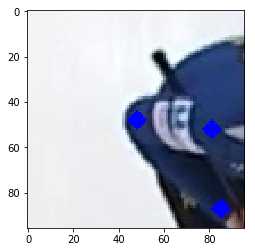

In [33]:
%matplotlib inline

test_img = cv2.imread('mp2/cropped_imgs/0.jpeg')
test_joints = new_joint_lst[0]
for key, val in test_joints.items():
    print("key: ", key, 'x: ', val[0], 'y: ', val[1])
    test_img = cv2.circle(test_img, (int(val[0]), int(val[1])), 2, (255,0,0), 3)  
    
plt.imshow(test_img[...,::-1])

In [48]:
# Load pose configuration clusters
# Calculate mean for each cluster 
# Save the calculated mean in new pickle file

def group_joints_to_lst(new_joint_lst):
    joint_lst_map = {'r_elbow':[], 'r_wrist': [], 'r_shoulder': []}
    for joint_map in new_joint_lst:
        for joint in ['r_elbow', 'r_wrist', 'r_shoulder']:
            joint_lst_map[joint].append(joint_map[joint])
            
    return joint_lst_map
        
        
def calculate_and_save_pose_mean(cluster_pickle_file, new_joint_lst):
    clusters_map = pickle.load(open(cluster_pickle_file, 'rb'))
    mean_map = {}
    joint_lst_map = group_joints_to_lst(new_joint_lst) 
    for cluster_key in clusters_map:
        mean_map[cluster_key] = {}
        pos_samples, _ = clusters_map[cluster_key]
        for joint in ['r_elbow', 'r_wrist', 'r_shoulder']:    
            curr_joint_lst = np.array(joint_lst_map[joint])[pos_samples]
            mean_map[cluster_key][joint] = np.mean(curr_joint_lst)
        return mean_map
        

In [49]:
mean_map = calculate_and_save_pose_mean('training_data.p', new_joint_lst)

In [50]:
print('Mean map: ', mean_map)

Mean map:  {4544: {'r_wrist': 66.928421996444769, 'r_elbow': 47.511896435397809, 'r_shoulder': 35.856120103507926}}
